## 前処理

In [2]:
import pandas as pd

train = pd.read_csv('../dataset/train.csv', index_col=0) # 学習用データ
test = pd.read_csv('../dataset/test.csv', index_col=0) # 学習用データ   # 評価用データ

In [3]:
train.dtypes.index

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'MIS_Status', 'Sector', 'ApprovalDate', 'ApprovalFY', 'City', 'State',
       'BankState', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural'],
      dtype='object')

In [4]:
train.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,1,0,22-Sep-06,2006,PHOENIX,AZ,SD,"$80,000.00","$80,000.00","$68,000.00",0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,1,62,30-Jun-92,1992,MCALESTER,OK,OK,"$287,000.00","$287,000.00","$229,600.00",0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,1,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,"$31,983.00","$30,000.00","$15,000.00",1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,1,33,6-Oct-03,2004,NASHVILLE,TN,SD,"$229,000.00","$229,000.00","$229,000.00",0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,1,0,17-Dec-99,2000,POMONA,CA,CA,"$525,000.00","$525,000.00","$393,750.00",0


In [5]:
train[['DisbursementGross',  'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,GrAppv,SBA_Appv
0,"$80,000.00","$80,000.00","$68,000.00"
1,"$287,000.00","$287,000.00","$229,600.00"
2,"$31,983.00","$30,000.00","$15,000.00"
3,"$229,000.00","$229,000.00","$229,000.00"
4,"$525,000.00","$525,000.00","$393,750.00"


In [6]:
train[['DisbursementGross',  'GrAppv', 'SBA_Appv']]= \
train[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

test[['DisbursementGross',  'GrAppv', 'SBA_Appv']]= \
test[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
  
train[['DisbursementGross',  'GrAppv', 'SBA_Appv']].head()

/tmp/ipykernel_1257212/1307329474.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
/tmp/ipykernel_1257212/1307329474.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test[['DisbursementGross',  'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))


,DisbursementGross,GrAppv,SBA_Appv
0,80000.00,80000.00,68000.00
1,287000.00,287000.00,229600.00
2,31983.00,30000.00,15000.00
3,229000.00,229000.00,229000.00
4,525000.00,525000.00,393750.00


In [7]:
train.isnull().sum()

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
RevLineCr            1079
LowDoc                531
DisbursementDate      150
MIS_Status              0
Sector                  0
ApprovalDate            0
ApprovalFY              0
City                    0
State                   0
BankState              11
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
UrbanRural              0
dtype: int64

In [8]:
train.fillna('NULL', inplace=True)

In [9]:
train.head(10)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,1,0,22-Sep-06,2006,PHOENIX,AZ,SD,80000.00,80000.00,68000.00,0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,1,62,30-Jun-92,1992,MCALESTER,OK,OK,287000.00,287000.00,229600.00,0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,1,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,31983.00,30000.00,15000.00,1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,1,33,6-Oct-03,2004,NASHVILLE,TN,SD,229000.00,229000.00,229000.00,0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,1,0,17-Dec-99,2000,POMONA,CA,CA,525000.00,525000.00,393750.00,0
5,60,7,1.0,4,10,0,Y,N,1-Apr-12,0,44,26-Nov-93,1994,APLINGTON,IA,IA,69991.00,70000.00,35000.00,0
6,39,0,1.0,15,1,0,0,N,8-Nov-11,1,23,4-Jan-05,2005,DALLAS,TX,CA,50000.00,50000.00,25000.00,0
7,82,5,2.0,0,0,1,N,C,31-Jan-95,1,0,21-Nov-01,2002,HUDSON,NH,NH,414000.00,414000.00,414000.00,0
8,57,6,2.0,0,0,0,N,C,31-Jan-95,1,61,11-Jan-95,1995,WILLISTON,ND,ND,112500.00,112500.00,101250.00,0
9,25,1,1.0,0,0,1,N,N,30-Apr-07,1,0,23-Mar-04,2004,MESA,AZ,AZ,50000.00,50000.00,25000.00,2


## 特徴量探し

In [10]:
train.describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,MIS_Status,Sector,ApprovalFY,UrbanRural
count,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000,42307.000000
mean,108.601673,9.704304,1.210414,2.183728,3.478148,1955.056019,0.892689,32.933439,2001.537783,0.585742
std,84.569847,17.488022,0.407608,5.093980,8.113648,10541.388765,0.309512,22.291386,5.860527,0.741929
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,0.000000
25%,56.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,22.000000,1997.000000,0.000000
50%,82.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,33.000000,2003.000000,0.000000
75%,168.000000,12.000000,1.000000,2.000000,3.000000,1.000000,1.000000,44.000000,2006.000000,1.000000
max,360.000000,202.000000,2.000000,70.000000,140.000000,90709.000000,1.000000,81.000000,2014.000000,2.000000


In [11]:
numeric_columns = train.select_dtypes(include=['number']).columns
numeric_columns

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'MIS_Status', 'Sector', 'ApprovalFY', 'UrbanRural'],
      dtype='object')

今回は企業向けローンの返済可否予測というテーマを通して、ローンに関連したデータを基に、企業が返済不能になるかどうかの予測に挑戦して頂きます。このデータを活用することで、どの業種や地域が成長の機会を持っているか、あるいはどのような要因がビジネスの成功に影響を与えるかなど、金融機関は効果的な企業支援の戦略を立てることができます。

Term 融資期間
NoEmp 融資を受ける前の事業の従業員数
NewExist 新規ビジネスかどうか(1=既存, 0=新規)
CreateJob 企業が融資資金を使用して創出すると予想される雇用の数
RetainedJob 融資を受けたことで企業が維持すると予想される雇用の数
FranchiseCode どのブランドのフランチャイズかの五桁のコード(0,1は非フランチャイズ)
MIS_Status	ローンの状態(0=債務不履行, 1=完済)
Sector セクター
ApprovalFY 認証された財務年度
UrbanRural 1=都市部, 2=田舎, ０＝未定義

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  
train_numeric = train[numeric_columns]
  
# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']               # 目的変数
  
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
# LightGBMモデルの設定
lgbm = lgb.LGBMClassifier()
  
# モデルの訓練
lgbm.fit(X_train, y_train)
  
# モデルの評価
y_pred = lgbm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[LightGBM] [Info] Number of positive: 30192, number of negative: 3653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 33845, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.892067 -> initscore=2.112028
[LightGBM] [Info] Start training from score 2.112028
Accuracy: 0.8994327582131884


In [13]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.5691065243918456


In [14]:
## ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_numeric = train[numeric_columns]

# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']               # 目的変数

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifierモデルの設定
rf_model = RandomForestClassifier(random_state=42)

# モデルの訓練
rf_model.fit(X_train, y_train)

# モデルの評価
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.8938785157173245


In [15]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred_rf, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.5811006554539391


In [16]:
# # 標準化
# from sklearn.preprocessing import StandardScaler

# # 特徴量の列を指定
# feature_columns = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'Sector', 'ApprovalFY', 'UrbanRural']

# # 標準化
# scaler = StandardScaler()
# train_normalized = train.copy()
# train_normalized[feature_columns] = scaler.fit_transform(train[feature_columns])


In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# カテゴリカルデータの列を指定
categorical_columns = ['RevLineCr', 'LowDoc', 'State', 'UrbanRural']

# ワンホットエンコーディング
train_encoded = pd.get_dummies(train, columns=categorical_columns)

# 数値データとエンコーディング済みのカテゴリカルデータを取得
numeric_columns = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'MIS_Status']
train_numeric = train_encoded[numeric_columns]

# 'DisbursementGross', 'GrAppv', 'SBA_Appv'を数値型に変換
train_numeric['DisbursementGross'] = pd.to_numeric(train_numeric['DisbursementGross'], errors='coerce')
train_numeric['GrAppv'] = pd.to_numeric(train_numeric['GrAppv'], errors='coerce')
train_numeric['SBA_Appv'] = pd.to_numeric(train_numeric['SBA_Appv'], errors='coerce')

# 欠損値の処理
train_numeric.fillna(train_numeric.mean(), inplace=True)

# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']                # 目的変数

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMモデルの設定
lgbm = lgb.LGBMClassifier()

# モデルの訓練
lgbm.fit(X_train, y_train)

# モデルの評価
y_pred_categorical = lgbm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_categorical)}')


[LightGBM] [Info] Number of positive: 30192, number of negative: 3653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 33845, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.892067 -> initscore=2.112028
[LightGBM] [Info] Start training from score 2.112028


/tmp/ipykernel_1257212/2881695037.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric['DisbursementGross'] = pd.to_numeric(train_numeric['DisbursementGross'], errors='coerce')
/tmp/ipykernel_1257212/2881695037.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric['GrAppv'] = pd.to_numeric(train_numeric['GrAppv'], errors='coerce')
/tmp/ipykernel_1257212/2881695037.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Accuracy: 0.8990782320964311


In [18]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred_categorical, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.5717611336032389


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# カテゴリカルデータの列を指定
categorical_columns = ['RevLineCr', 'LowDoc', 'State', 'UrbanRural']

# ワンホットエンコーディング
train_encoded = pd.get_dummies(train, columns=categorical_columns)

# 数値データとエンコーディング済みのカテゴリカルデータを取得
numeric_columns = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'MIS_Status']
train_numeric = train_encoded[numeric_columns]

# 'DisbursementGross', 'GrAppv', 'SBA_Appv'を数値型に変換
train_numeric['DisbursementGross'] = pd.to_numeric(train_numeric['DisbursementGross'], errors='coerce')
train_numeric['GrAppv'] = pd.to_numeric(train_numeric['GrAppv'], errors='coerce')
train_numeric['SBA_Appv'] = pd.to_numeric(train_numeric['SBA_Appv'], errors='coerce')

# 欠損値の処理（例: 平均値で埋める）
numeric_features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'DisbursementGross', 'GrAppv', 'SBA_Appv']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']                # 目的変数

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの設定
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# モデルの訓練
model.fit(X_train, y_train)

# モデルの評価
y_pred_rf_categorical = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf_categorical)}')


/tmp/ipykernel_1257212/124116604.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric['DisbursementGross'] = pd.to_numeric(train_numeric['DisbursementGross'], errors='coerce')
/tmp/ipykernel_1257212/124116604.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric['GrAppv'] = pd.to_numeric(train_numeric['GrAppv'], errors='coerce')
/tmp/ipykernel_1257212/124116604.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Accuracy: 0.8886787993382179


In [20]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred_rf_categorical, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.5833119531991476


In [21]:
import pandas as pd
from datetime import datetime

# データの読み込み
# ここでは、データフレームをtrainとして仮定しています。データを実際のデータに置き換えてください。
# train = pd.read_csv('your_data.csv')

# 新しい特徴量の生成

# 同じ州に所在しているかどうかを示す特徴量
train['SameState'] = (train['City'] + train['State'] == train['BankState']).astype(int)

# "NULL" を NaN に変換してから、NaN を含む行を削除
train['DisbursementDate'] = train['DisbursementDate'].replace('NULL', pd.NaT)
train = train.dropna(subset=['DisbursementDate'])

# 新しい特徴量の生成
train['DaysToDisbursement'] = (pd.to_datetime(train['DisbursementDate']) - pd.to_datetime(train['ApprovalDate'])).dt.days


# 承認されたローンの額の割合を示す特徴量
train['LoanApprovalRatio'] = train['SBA_Appv'].str.replace('$', '').astype(float) / train['GrAppv'].str.replace('$', '').astype(float)

# 季節・四半期を示す特徴量
train['ApprovalFY'] = train['ApprovalFY'].astype(str)
train['Quarter'] = pd.to_datetime(train['ApprovalFY']).dt.quarter

# 結果の表示（任意）
print(train[['SameState', 'DaysToDisbursement', 'LoanApprovalRatio', 'Quarter']])


/tmp/ipykernel_1257212/1579972191.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['DaysToDisbursement'] = (pd.to_datetime(train['DisbursementDate']) - pd.to_datetime(train['ApprovalDate'])).dt.days
/tmp/ipykernel_1257212/1579972191.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['DaysToDisbursement'] = (pd.to_datetime(train['DisbursementDate']) - pd.to_datetime(train['ApprovalDate'])).dt.days


       SameState  DaysToDisbursement  LoanApprovalRatio  Quarter
0              0               -3156               0.85        1
1              0                 488               0.80        1
2              0                 135               0.50        1
3              0                1425               1.00        1
4              0               -6036               0.75        1
...          ...                 ...                ...      ...
42302          0                1066               0.85        1
42303          0               -5908               0.85        1
42304          0                 -14               0.85        1
42305          0                3031               0.75        1
42306          0               -7833               0.75        1

[42157 rows x 4 columns]


In [22]:
new_numeric_columns = train.select_dtypes(include=['number']).columns
new_numeric_columns

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'MIS_Status', 'Sector', 'UrbanRural', 'SameState',
       'DaysToDisbursement', 'LoanApprovalRatio', 'Quarter'],
      dtype='object')

In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  
train_numeric = train[new_numeric_columns]
  
# データの準備
X = train_numeric.drop('MIS_Status', axis=1)  # 特徴量
y = train_numeric['MIS_Status']               # 目的変数
  
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
# LightGBMモデルの設定
lgbm = lgb.LGBMClassifier()
  
# モデルの訓練
lgbm.fit(X_train, y_train)
  
# モデルの評価
y_pred_add = lgbm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_add)}')

[LightGBM] [Info] Number of positive: 30143, number of negative: 3582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 33725, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.893788 -> initscore=2.130031
[LightGBM] [Info] Start training from score 2.130031
Accuracy: 0.8932637571157496


In [24]:
from sklearn.metrics import f1_score
  
mean_f1 = f1_score(y_test, y_pred_add, average='macro')
print(f'Mean F1 Score: {mean_f1}')

Mean F1 Score: 0.5548234499070789


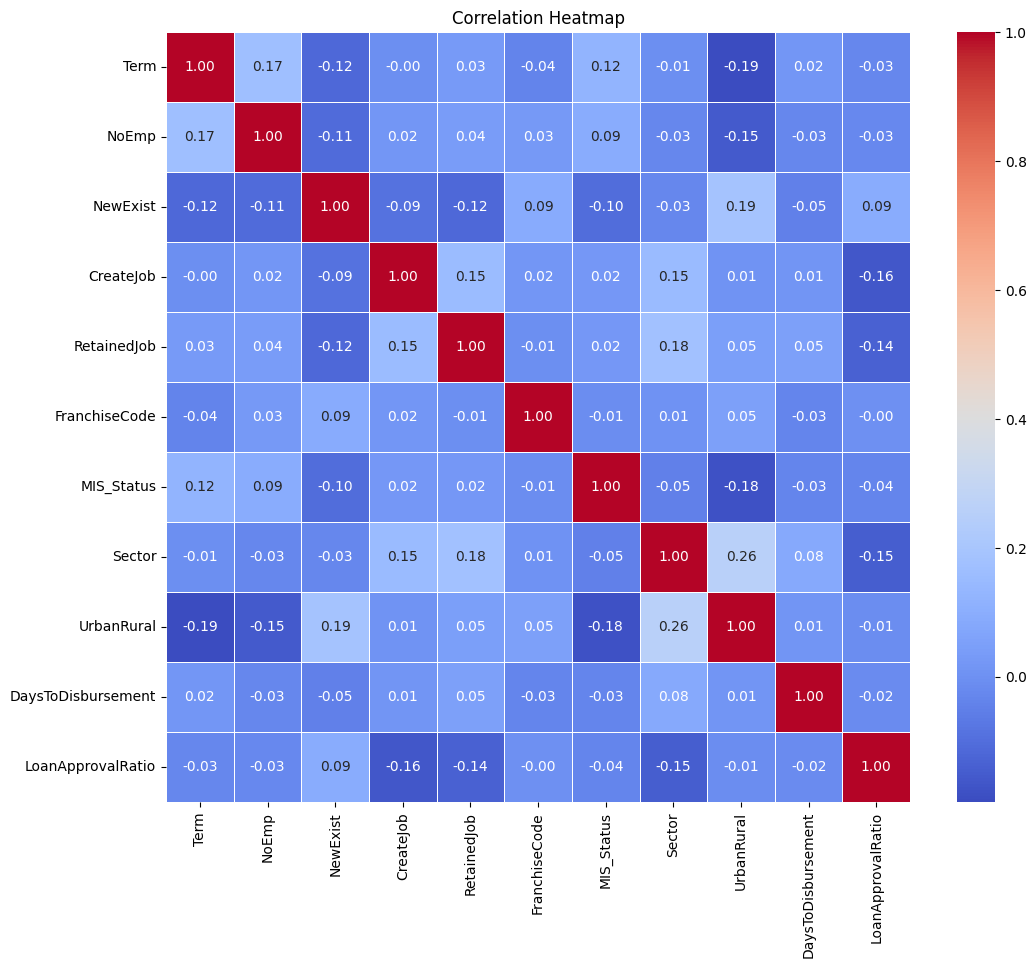

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 指定された特徴量の相関行列を計算
corr_matrix = train[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
                     'FranchiseCode', 'MIS_Status', 'Sector', 'UrbanRural',
                     'DaysToDisbursement', 'LoanApprovalRatio']].corr()

# 相関ヒートマップの作成
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


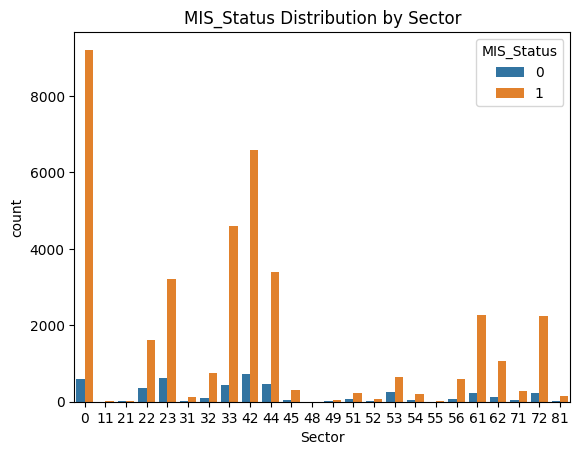

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# カテゴリごとにMIS_Statusの分布を可視化
sns.countplot(x='Sector', hue='MIS_Status', data=train)
plt.title('MIS_Status Distribution by Sector')
plt.show()


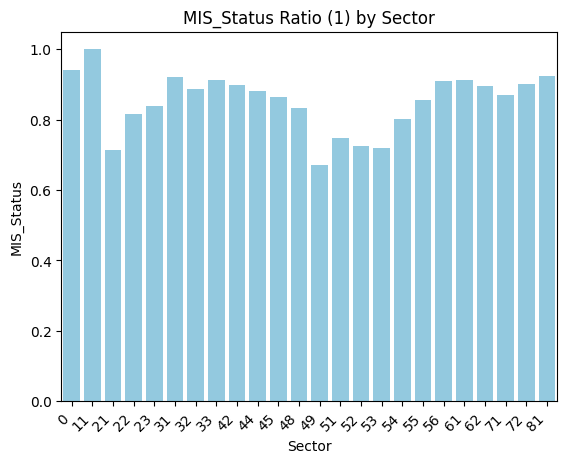

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# カテゴリごとにMIS_Statusが1の割合を計算(完済割合)
mis_status_ratio = train.groupby('Sector')['MIS_Status'].mean().reset_index()

# barplot
sns.barplot(x='Sector', y='MIS_Status', data=mis_status_ratio, color='skyblue')
plt.title('MIS_Status Ratio (1) by Sector')
plt.xticks(rotation=45, ha='right')
plt.show()
